# Keras

In [1]:
%matplotlib inline

In [7]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np

url = 'https://assets.datacamp.com/production/course_1975/datasets/hourly_wages.csv'
urlretrieve(url, 'dc_hourly_wages.csv')
df = pd.read_csv('dc_hourly_wages.csv')

predictors = np.array(df.drop('wage_per_hour', axis=1).values)
target = np.array(df.wage_per_hour.values)

In [8]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors,target)

Epoch 1/1
534/534 [==============================] - 0s 484us/step - loss: 28.6490


### For Classification:
- use 'categorical_crossentropy' as the loss function
- add metrics=['accuracy'] for diagnostics
- output layer has a separate node for each possible outcome and uses the 'softmax' activation function

In [9]:
url = 'https://assets.datacamp.com/production/course_1975/datasets/titanic_all_numeric.csv'
urlretrieve(url, 'dc_titanic_nn.csv')
titanic = pd.read_csv('dc_titanic_nn.csv')

titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [10]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

predictors = titanic.drop(['survived'], axis=1).as_matrix()

n_cols = predictors.shape[1]

# Convert the target to categorical: target
target = to_categorical(titanic.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

Epoch 1/1
891/891 [==============================] - 0s 217us/step - loss: 2.0139 - acc: 0.6364


In [21]:
from sklearn.model_selection import train_test_split

predictors = titanic.drop(['survived'], axis=1).as_matrix()
target = to_categorical(titanic.survived)
n_cols = predictors.shape[1]

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

# Calculate predictions: predictions
predictions = model.predict(X_test)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

Epoch 1/10
623/623 [==============================] - 0s 324us/step - loss: 2.6224 - acc: 0.5361
Epoch 2/10
623/623 [==============================] - 0s 36us/step - loss: 0.9570 - acc: 0.6340
Epoch 3/10
623/623 [==============================] - 0s 38us/step - loss: 1.1364 - acc: 0.5955
Epoch 4/10
623/623 [==============================] - 0s 39us/step - loss: 0.7811 - acc: 0.6372
Epoch 5/10
623/623 [==============================] - 0s 43us/step - loss: 0.7125 - acc: 0.6565
Epoch 6/10
623/623 [==============================] - 0s 46us/step - loss: 0.6467 - acc: 0.6677
Epoch 7/10
623/623 [==============================] - 0s 37us/step - loss: 0.6542 - acc: 0.6533
Epoch 8/10
623/623 [==============================] - 0s 43us/step - loss: 0.7754 - acc: 0.6870
Epoch 9/10
623/623 [==============================] - 0s 43us/step - loss: 0.6200 - acc: 0.6693
Epoch 10/10
623/623 [==============================] - 0s 39us/step - loss: 0.6126 - acc: 0.6758
[0.51397085 0.4565545  0.49219638 0.63

In [27]:
input_shape = (10,)
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [29]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors,target, epochs=10)



Testing model with learning rate: 0.000001

Epoch 1/10
891/891 [==============================] - 0s 357us/step - loss: 1.0500
Epoch 2/10
891/891 [==============================] - 0s 39us/step - loss: 1.0411
Epoch 3/10
891/891 [==============================] - 0s 42us/step - loss: 1.0327
Epoch 4/10
891/891 [==============================] - 0s 39us/step - loss: 1.0246
Epoch 5/10
891/891 [==============================] - 0s 37us/step - loss: 1.0169
Epoch 6/10
891/891 [==============================] - 0s 38us/step - loss: 1.0095
Epoch 7/10
891/891 [==============================] - 0s 40us/step - loss: 1.0026
Epoch 8/10
891/891 [==============================] - 0s 44us/step - loss: 0.9959
Epoch 9/10
891/891 [==============================] - 0s 41us/step - loss: 0.9896
Epoch 10/10
891/891 [==============================] - 0s 46us/step - loss: 0.9835


Testing model with learning rate: 0.010000

Epoch 1/10
891/891 [==============================] - 0s 388us/step - loss: 1.2448
Epo

### Validation

In [32]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors,target, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 1s 828us/step - loss: 1.0099 - acc: 0.6083 - val_loss: 0.7292 - val_acc: 0.6119
Epoch 2/30
623/623 [==============================] - 0s 52us/step - loss: 0.6499 - acc: 0.6693 - val_loss: 0.6736 - val_acc: 0.6418
Epoch 3/30
623/623 [==============================] - 0s 57us/step - loss: 0.6262 - acc: 0.6597 - val_loss: 0.5957 - val_acc: 0.7015
Epoch 4/30
623/623 [==============================] - 0s 58us/step - loss: 0.6012 - acc: 0.6822 - val_loss: 0.5486 - val_acc: 0.7239
Epoch 5/30
623/623 [==============================] - 0s 58us/step - loss: 0.8109 - acc: 0.6308 - val_loss: 0.7310 - val_acc: 0.5410
Epoch 6/30
623/623 [==============================] - 0s 57us/step - loss: 0.8107 - acc: 0.6308 - val_loss: 0.6526 - val_acc: 0.7090


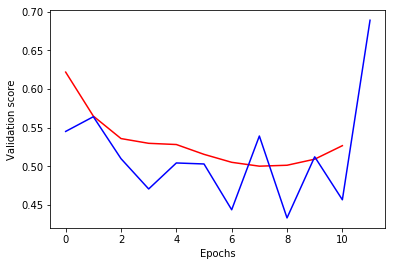

In [37]:
import matplotlib.pyplot as plt

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=3)

# Create the new model: model_2
model_1 = Sequential()
model_2 = Sequential()

# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

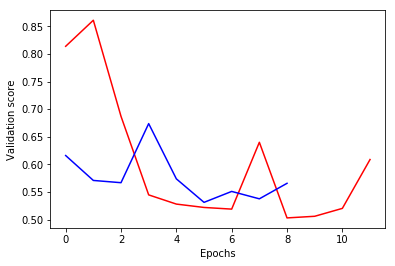

In [38]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_1 = Sequential()
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

### Workflow
- start with a small network, get validation score
- keep increasing capacity (more nodes/layers) until validation score is no longer improving

### Digits

In [49]:
url = 'https://assets.datacamp.com/production/course_1975/datasets/mnist.csv'
urlretrieve(url,'dc_mnist_big.csv')
digits = pd.read_csv('dc_mnist_big.csv', header=None)
digits.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617
1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [71]:
X = digits.drop([0], axis=1).as_matrix()
y = pd.get_dummies(digits[0].values).as_matrix()

In [80]:
early_stopping_monitor = EarlyStopping(patience=5)

# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X,y, epochs=100, validation_split=0.3, callbacks=[early_stopping_monitor])

Train on 1400 samples, validate on 601 samples
Epoch 1/100
1400/1400 [==============================] - 1s 1ms/step - loss: 11.6229 - acc: 0.2643 - val_loss: 10.9624 - val_acc: 0.3062
Epoch 2/100
1400/1400 [==============================] - 0s 103us/step - loss: 10.4098 - acc: 0.3457 - val_loss: 9.5332 - val_acc: 0.3960
Epoch 3/100
1400/1400 [==============================] - 0s 109us/step - loss: 9.3977 - acc: 0.4071 - val_loss: 9.4688 - val_acc: 0.4010
Epoch 4/100
1400/1400 [==============================] - 0s 110us/step - loss: 9.2065 - acc: 0.4221 - val_loss: 9.7058 - val_acc: 0.3894
Epoch 5/100
1400/1400 [==============================] - 0s 104us/step - loss: 9.3008 - acc: 0.4157 - val_loss: 9.1908 - val_acc: 0.4193
Epoch 6/100
1400/1400 [==============================] - 0s 115us/step - loss: 7.8387 - acc: 0.4950 - val_loss: 8.6312 - val_acc: 0.4476
Epoch 7/100
1400/1400 [==============================] - 0s 110us/step - loss: 6.5637 - acc: 0.5793 - val_loss: 6.9269 - val_acc: 